#The "We Rate Dogs" Twitter archive contains over 5000 tweets, which have been filtered to create the enhanced archive that forms the basis of this analysis. The goal of this project is to wrangle the data - gather, assess, and clean - into a tidy dataset, and then provide analyses and visualizations.

#The first step is to import all the libraries require to analyze the data.

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import datetime
import random

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

# set the option to display the full string from a pandas DataFrame

In [4]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

C:\Users\USER\AppData\Local\Temp\ipykernel_13852\853985015.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


 Gathering data  for enhanced twitter archive. The WeRateDogs Twitter archive is provided  as the starting point is obtained 
manually from the udacity server.

 #load the provided enhanced twitter archive file into a DataFrame

In [5]:
archive = pd.read_csv(r'D:\Data analyst ALX\twitter-archive-enhanced.csv')

archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2321,666435652385423360,NaN,NaN,2015-11-17 02:00:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Can you behave? You're ruining my wedding day...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/666435652...,10,10,None,None,None,None,None
783,775350846108426240,NaN,NaN,2016-09-12 15:10:21 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Maximus. A little rain won't stop him....,NaN,NaN,NaN,https://vine.co/v/ijmv0PD0XXD,12,10,Maximus,None,None,None,None
2030,671789708968640512,NaN,NaN,2015-12-01 20:35:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is space pup. He's very confused. Tries t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671789708...,13,10,space,None,None,None,None


In [14]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#Here is a sample of one of the tweets, with additional output to display the entire field's data.

In [16]:
sample_tweet = df_twitter_archive.iloc[2]
sample_tweet

tweet_id                      891815181378084864                                                                                                                               
in_reply_to_status_id         NaN                                                                                                                                              
in_reply_to_user_id           NaN                                                                                                                                              
timestamp                     2017-07-31 00:18:03 +0000                                                                                                                        
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                               
text                          This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never 

In [17]:
sample_tweet.text 

'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB'

In [18]:
sample_tweet.expanded_urls

'https://twitter.com/dog_rates/status/891815181378084864/photo/1'

In [19]:
sample_tweet.source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

 download image_predictions using requests do as to get the file using the URL provided.

In [18]:
url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
    
image_pred = pd.read_csv('image-predictions.tsv', sep='\t')
image_pred.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
262,670789397210615808,https://pbs.twimg.com/media/CU8fZSQWoAEVp6O.jpg,1,beagle,0.295966,True,basset,0.143527,True,bluetick,0.138992,True
1351,759846353224826880,https://pbs.twimg.com/media/CouEOZhWAAAgFpE.jpg,1,Sussex_spaniel,0.355395,True,vizsla,0.141094,True,otterhound,0.092198,True
575,678643457146150913,https://pbs.twimg.com/media/CWsGnyMVEAAM1Y1.jpg,1,Labrador_retriever,0.338757,True,flat-coated_retriever,0.304470,True,chest,0.093392,False


In [43]:
ls *.tsv

 Volume in drive C has no label.
 Volume Serial Number is 9CE1-51E6

 Directory of C:\Users\USER

08/18/2022  01:51 AM           335,079 image-predictions.tsv
               1 File(s)        335,079 bytes
               0 Dir(s)  156,961,353,728 bytes free


In [44]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [46]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [49]:
image_pred.iloc[2]

tweet_id    666033412701032449                             
jpg_url     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
img_num     1                                              
p1          German_shepherd                                
p1_conf     0.596461                                       
p1_dog      True                                           
p2          malinois                                       
p2_conf     0.138584                                       
p2_dog      True                                           
p3          bloodhound                                     
p3_conf     0.116197                                       
p3_dog      True                                           
Name: 2, dtype: object

#Download Tweet JSON Data

#Using the developer keys

In [2]:
CONSUMER_KEY = 'xxxxxxxxxxx'
CONSUMER_SECRET = 'xxxxxxxxx' 
OAUTH_TOKEN = 'xxxxxxxxxxxx'
OAUTH_TOKEN_SECRET ='xxxxxxxxxxx'

In [ ]:
#Create the Twitter API object and set rate limit params

In [3]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

api = tweepy.API(auth_handler = auth, 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [9]:
tweet_ids = archive.tweet_id.values
print("# of tweet_ids: " + str(len(tweet_ids)) + "\n")

count = 0
tweet_json_list = []
fails_dict = {}

start_time = time.time()

for tweet_id in tweet_ids:
    count += 1
    try:
        # attempt to get the tweet's JSON data and append to the tweet JSON list
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_json_list.append(tweet._json)
    except tweepy.TweepError as err:
        # save the error to the fail dictionary for review
        print("TweepError for id:  " + str(tweet_id))
        fails_dict[tweet_id] = err
        pass
    # To save space, only print out loop/tweet id for every 100th tweet
    if count % 100 == 0:
        print("loop # " + str(count))

elapsed_time = time.time() - start_time

elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print("\nTime elapsed (HH:MM:SS):  " + elapsed_time_str + "\n")

# display list of tweets with errors
print("Number of TweepErrors:  {}\n".format(len(fails_dict)))
for tweet_id in fails_dict:
    print(tweet_id, fails_dict[tweet_id])

# of tweet_ids: 2356

TweepError for id:  888202515573088257
TweepError for id:  873697596434513921
loop # 100
TweepError for id:  872668790621863937
TweepError for id:  872261713294495745
TweepError for id:  869988702071779329
TweepError for id:  866816280283807744
TweepError for id:  861769973181624320
TweepError for id:  856602993587888130
TweepError for id:  856330835276025856
loop # 200
TweepError for id:  851953902622658560
TweepError for id:  851861385021730816
TweepError for id:  851591660324737024
TweepError for id:  851464819735769094
TweepError for id:  851224888060895234
TweepError for id:  847971574464610304
TweepError for id:  847962785489326080
TweepError for id:  845459076796616705
TweepError for id:  844704788403113984
TweepError for id:  842892208864923648
TweepError for id:  842846295480000512
TweepError for id:  842765311967449089
TweepError for id:  837366284874571778
TweepError for id:  837012587749474308
loop # 300
TweepError for id:  829374341691346946
TweepErro

Rate limit reached. Sleeping for: 24


loop # 1300
TweepError for id:  707693576495472641
TweepError for id:  707629649552134146
TweepError for id:  707610948723478529
loop # 1400
loop # 1500
loop # 1600
loop # 1700
TweepError for id:  680055455951884288
TweepError for id:  678708137298427904
TweepError for id:  677961670166224897
TweepError for id:  677700003327029250
TweepError for id:  677698403548192770
TweepError for id:  677687604918272002
TweepError for id:  677565715327688705
TweepError for id:  677557565589463040
TweepError for id:  677547928504967168
loop # 1800
TweepError for id:  676897532954456065
TweepError for id:  676864501615042560
TweepError for id:  676617503762681856
TweepError for id:  676613908052996102
TweepError for id:  676606785097199616
TweepError for id:  676440007570247681
TweepError for id:  676430933382295552
TweepError for id:  676263575653122048
loop # 1900
TweepError for id:  673350198937153538
TweepError for id:  673345638550134785
TweepError for id:  673342308415348736
TweepError for id: 

Rate limit reached. Sleeping for: 15


loop # 2300

Time elapsed (HH:MM:SS):  00:38:17

Number of TweepErrors:  81

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 [{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856 [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 [{'code': 144, 'message': 'No status found with that ID.'}]
851861385021730816 [{'code': 144, 'message': 'No status found with that ID.'}]
851591660324737024 Failed to send request: ('Connectio

In [10]:
tweet_json_file ='tweet_json.txt'

In [11]:
with open(tweet_json_file, 'w') as outfile:
    for tweet_json in tweet_json_list:
        json.dump(tweet_json, outfile)
        outfile.write('\n')

In [14]:
ls tweet_json.txt

 Volume in drive C has no label.
 Volume Serial Number is 9CE1-51E6

 Directory of C:\Users\USER

08/19/2022  01:00 AM        10,394,826 tweet_json.txt
               1 File(s)     10,394,826 bytes
               0 Dir(s)  156,972,265,472 bytes free


In [12]:
# read in the JSON data from the text file, and save to a DataFrame
tweet_json_data = []

with open(tweet_json_file, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
df_tweet_data_extra = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

df_tweet_data_extra.head(30)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6979,33727
1,892177421306343426,5281,29257
2,891815181378084864,3466,21991
3,891689557279858688,7201,36823
4,891327558926688256,7722,35217
5,891087950875897856,2589,17760
6,890971913173991426,1648,10341
7,890729181411237888,15697,56705
8,890609185150312448,3605,24459
9,890240255349198849,6083,27877


In [13]:
df_tweet_data_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2275 non-null   int64
 1   retweet_count   2275 non-null   int64
 2   favorite_count  2275 non-null   int64
dtypes: int64(3)
memory usage: 53.4 KB


In [34]:
df_tweet_data_extra.to_csv('tweet_data_extra.csv', index = False)

Assessing the data from the 3 files

In this section I assess the data that was gathered, both visually and programmatically for quality and tidiness issues. One of the key points for the analysis requires that only tweets with original ratings with images, no retweets, be retained.

The quality of data is assessed against dimensions or criteria concerning the content: completeness, validity, accuracy and consistency.


Load the data gathered data files

In [19]:
archive = pd.read_csv(r'D:\Data analyst ALX\twitter-archive-enhanced.csv')
predictions = pd.read_csv('image-predictions.tsv', sep = '\\t', engine = 'python')
json_data = pd.read_csv('tweet_data_extra.csv')

Archive

In [39]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The info() method reveals several quality and tidiness issues:

There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
There are 78 replies (in_reply_to_status_id, in_reply_to_user_id)
There are 2297 tweets with expanded_urls (links to images) indicating 59 tweets with missing data
The timestamp field is in string format (object)
There are 4 columns for dog stages (doggo, floofer, pupper, puppo)
The columns related to retweets are not applicable for original tweets
The columns related to replies are not applicable for original tweets

In [40]:
print("Data type for timestamp:  " + str(type(archive.timestamp[0])))

Data type for timestamp:  <class 'str'>


In [41]:
print("Duplicated:  {}".format(sum(archive.duplicated())))

Duplicated:  0


In [42]:
archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [43]:
archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twi

The head() and tail() methods show us several issues:

Quality:

The timestamp column has dates in string form.
Some of the rows from the tail() output above have invalid strings in the name column, e.g. "a", "an", "in". These words are all the 3rd word in the tweet.
Values of "None" in the name column.
Tidiness:

The columns with numerical data that are typically used for analysis are located to the far right of the table, and the columns with long strings are on the left; this makes it difficult to readily see the data that will be used for analyses.

First we'll check the name column, starting with value counts.

In [44]:
archive.name.value_counts().head(50)

None        745
a           55 
Charlie     12 
Cooper      11 
Lucy        11 
Oliver      11 
Tucker      10 
Penny       10 
Lola        10 
Winston     9  
Bo          9  
Sadie       8  
the         8  
Daisy       7  
Buddy       7  
Toby        7  
an          7  
Bailey      7  
Leo         6  
Oscar       6  
Stanley     6  
Rusty       6  
Bella       6  
Dave        6  
Jack        6  
Koda        6  
Scout       6  
Jax         6  
Milo        6  
Louis       5  
Phil        5  
Sammy       5  
Gus         5  
Chester     5  
Alfie       5  
Sunny       5  
Bentley     5  
very        5  
Oakley      5  
Finn        5  
George      5  
Larry       5  
Clarence    4  
Loki        4  
Walter      4  
Reggie      4  
Hank        4  
Scooter     4  
Duke        4  
quite       4  
Name: name, dtype: int64

It looks like the dog names are all capitalized, so words that begin in lowercase are probably not names, like "a", "the" and "an". Here's the list of these "names".

list all names that are NOT capitalized

In [45]:
err_names_mask = archive.name.str.contains('^[a-z]', regex = True)
archive[err_names_mask].name.value_counts().sort_index()

a               55
actually        2 
all             1 
an              7 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            4 
life            1 
light           1 
mad             2 
my              1 
not             2 
officially      1 
old             1 
one             4 
quite           4 
space           1 
such            1 
the             8 
this            1 
unacceptable    1 
very            5 
Name: name, dtype: int64

In [46]:
len(archive[err_names_mask])

109

This list contains non-capitalized words from the name column for 109 tweets, none of which are a valid name.

expanded_urlsNext, check the tweets that are missing data in expanded_urls, are they replies or retweets?

number of tweets with missing urls

In [47]:

sum(archive.expanded_urls.isna())

59

 how many tweets with missing urls are replies or retweets?

In [48]:

sum(archive.expanded_urls.isna() & \
    (archive.in_reply_to_status_id.notnull() | \
     archive.retweeted_status_id.notnull()))

56

# display tweets that are missing urls, and are NOT replies and are NOT retweets

In [49]:
# display tweets that are missing urls, and are NOT replies and are NOT retweets
mask = archive.expanded_urls.isna() & \
       archive.in_reply_to_status_id.isna() & \
       archive.retweeted_status_id.isna()
archive[mask][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 would listen,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


#Of the 59 tweets that are missing data in expanded_urls, 56 are replies or retweets. The remaining 3 tweets (at indexes 375, 707 and 1445) with NaN in the expanded_urls column all have valid ratings but no urls within the text column.

The question now is whether these tweets are part of the predictions or json_data tables.

# are any of these tweets in the predictions table?

In [50]:

tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = predictions.tweet_id.isin(tweet_set)
sum(find_tweet_id)

0

# are any of these tweets in the json_data table?

In [51]:

tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = json_data.tweet_id.isin(tweet_set)
json_data[find_tweet_id]

,tweet_id,retweet_count,favorite_count
344,828361771580813312,165,2067
654,785515384317313025,1158,5776
1373,696518437233913856,1566,3633


#It turns out that these 3 tweets are NOT in the predictions table, and even though they ARE in the json_data table, there was NO image url extracted from the JSON data.

#rating_numerator and rating_denominator.

In [52]:
archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


#For rating_numerator and rating_denominator, the describe() method shows us some quality issues:

The max values are huge: 1776, 170.
The minimum is 0 for both.

In [53]:
archive.rating_denominator.value_counts().sort_index(ascending = False)

170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
80     2   
70     1   
50     3   
40     1   
20     2   
16     1   
15     1   
11     3   
10     2333
7      1   
2      1   
0      1   
Name: rating_denominator, dtype: int64

In [54]:
sum(archive.rating_denominator != 10)

23

#It's interesting that many of the larger numbers are multiples of 10. When looking at some of those tweets we see that there is more than 1 dog in the photo. Ignoring the retweets and replies we have the following list.

# display tweets that do NOT have denominator of 10,
# and are NOT replies and are NOT retweets

In [55]:

mask_find = (archive.rating_denominator != 10) & \
            archive.in_reply_to_status_id.isna() & \
            archive.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,810984652412424192,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",709198395643068416,45,50


In [56]:
sum(mask_find)

17

In [57]:
archive.rating_numerator.value_counts().sort_index(ascending = False)

1776    1  
960     1  
666     1  
420     2  
204     1  
182     1  
165     1  
144     1  
143     1  
121     1  
99      1  
88      1  
84      1  
80      1  
75      2  
60      1  
50      1  
45      1  
44      1  
27      1  
26      1  
24      1  
20      1  
17      1  
15      2  
14      54 
13      351
12      558
11      464
10      461
9       158
8       102
7       55 
6       32 
5       37 
4       17 
3       19 
2       9  
1       9  
0       2  
Name: rating_numerator, dtype: int64

In [58]:
sum(archive.rating_numerator >= 15)

28

#The output above shows ALL the rating_numerator values, showing a count of 28 tweets with numerator >= 15. Next, looking at ONLY those ratings with denominators = 10, the results are as follows:

In [59]:
df_tweets_denom_10 = archive[archive.rating_denominator == 10]
df_tweets_denom_10.rating_numerator.value_counts().sort_index(ascending = False)

1776    1  
666     1  
420     2  
182     1  
75      2  
27      1  
26      1  
17      1  
15      2  
14      54 
13      351
12      558
11      463
10      461
9       156
8       102
7       54 
6       32 
5       37 
4       15 
3       19 
2       9  
1       8  
0       2  
Name: rating_numerator, dtype: int64

In [60]:
sum(df_tweets_denom_10.rating_numerator >= 15)

12

#Looking ONLY at tweets that have denominators = 10, there are 12 with numerators >= 15. I chose 15 as the lower boundary because it's got just 2 counts, while 14 has a count of 54. We can check the texts to see if the numerator makes sense.

NOTE: The next queries ignore retweets and replies.

# display tweets with numerator >= 15 that DO have denominator of 10,
# and are NOT replies and are NOT retweets

In [61]:

mask_find = (archive.rating_denominator == 10) & \
            (archive.rating_numerator >= 15) & \
            archive.in_reply_to_status_id.isna() & \
            archive.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",786709082849828864,75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,778027034220126208,27,10
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,749981277374128128,1776,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,680494726643068929,26,10
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,670842764863651840,420,10


#Here we have 5 tweets (excluding retweets and replies) with denominator = 10 and numerator >= 15. Looking at the text column we see ratings with decimals or huge numbers.

Since there are so few, and I don't want to impose a rating myself, I'll ignore these tweets and drop them.

# display tweets with numerator = 0 that DO have denominator of 10,
# and are NOT replies and are NOT retweets

In [62]:

mask_find = (archive.rating_denominator == 10) & \
            (archive.rating_numerator == 0) & \
            archive.in_reply_to_status_id.isna() & \
            archive.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
archive[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,835152434251116546,0,10


#And lastly, here is a tweet with numerator (rating) of '0'. 

#source

#There are only 4 types of sources, and they can be simplified by using the display string portion just before the final "<\a>":

Twitter for iPhone
Vine - Make a Scene
Twitter Web Client
TweetDeck

In [63]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [6]:
archive.doggo.value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [7]:
archive.floofer.value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [8]:
archive.pupper.value_counts()

None      2099
pupper    257 
Name: pupper, dtype: int64

In [9]:
archive.puppo.value_counts()

None     2326
puppo    30  
Name: puppo, dtype: int64

In [10]:
archive[archive.floofer == 'floofer'].text

46      Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP 
200     At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
582     This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5                                         
774     Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744                                    
984     This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB                         
1022    Here's a golden floofer helping with the groceries. Bed got in way. Still 11/10 helpful af (vid by @categoen) https://t.co/6ZRo

#Using the floofer category as an example, it looks like there are a few ways that this type is spelled: "floofer", "floofiest", and "Floofer".
The other dog stage types may be similar in the variety of spelling.

#predictions

In [16]:
image_pred.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
image_pred.p1_dog.value_counts()

True     1532
False    543 
Name: p1_dog, dtype: int64

In [19]:
image_pred .p2_dog.value_counts()

True     1553
False    522 
Name: p2_dog, dtype: int64

In [20]:
image_pred .p3_dog.value_counts()

True     1499
False    576 
Name: p3_dog, dtype: int64

#check out 20 of the entries that don't predict dogs

In [22]:
image_pred[~image_pred.p1_dog & \
               ~image_pred.p2_dog & \
               ~image_pred.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head(20)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False
29,666411507551481857,coho,False,barracouta,False,gar,False
45,666786068205871104,snail,False,slug,False,acorn,False
50,666837028449972224,triceratops,False,armadillo,False,common_iguana,False
51,666983947667116034,swab,False,chain_saw,False,wig,False
53,667012601033924608,hyena,False,African_hunting_dog,False,coyote,False


In [23]:
sum(~image_pred.p1_dog & \
    ~image_pred.p2_dog & \
    ~image_pred.p3_dog)

324

#In each of the prediction columns there are over 500 instances where the algorithm did not predict a dog breed from the image. When combined, there are 324 cases where there is NO valid dog breed from any of the three predictions.

The best prediction for dog breed could be combined with the twitter archive table; this is essentially another variable pertaining to the dog on which the archive is based.

json_data

In [59]:
json_data = pd.read_csv('tweet_data_extra.csv')

In [36]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2263 non-null   int64
 1   retweet_count   2263 non-null   int64
 2   favorite_count  2263 non-null   int64
dtypes: int64(3)
memory usage: 53.2 KB


In [37]:
json_data.head(20)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6981,33728
1,892177421306343426,5281,29261
2,891815181378084864,3468,21992
3,891689557279858688,7202,36834
4,891327558926688256,7724,35219
5,891087950875897856,2590,17763
6,890971913173991426,1649,10342
7,890729181411237888,15699,56712
8,890609185150312448,3606,24460
9,890240255349198849,6084,27880


In [66]:
json_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.263000e+03,2263.000000,2263.000000
mean,7.411834e+17,2424.585064,6975.355722
std,6.811727e+16,4017.516117,10718.642808
min,6.660209e+17,1.000000,0.000000
25%,6.776532e+17,488.000000,1201.000000
50%,7.164471e+17,1133.000000,3027.000000
75%,7.961638e+17,2840.000000,8558.500000
max,8.924206e+17,70451.000000,144449.000000


                                              Assessment Summary
                                         Quality issues in the various datasets
                                         
                                         Archive dataset


(1) There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp).

(2)There are 78 reply tweets (in_reply_to_status_id, in_reply_to_user_id).

(3) There are 2297 tweets with expanded_urls (links to the tweet), indicating 59 tweets with missing data.

 (3.1)56 of these tweets are replies or retweets.
 (3.2)The remaining 3 tweets have not got the url within the text column. They are NOT in the predictions table, but even though they ARE in the json_data, there was NO image url in the JSON data.

(4) The timestamp column is in string format.

(5) There are 109 tweets with regular words in the name column that are NOT a valid name; these words are always the 3rd word in the tweet and are all lowercase; all valid names start with an uppercase letter.

(6) There are 775 tweets with the dog name as "None". (Probably not worth looking at as there are too many to verify.) This issue will not be cleaned

(7)Ignoring replies and retweets, there are 17 tweets with rating_denominator NOT equal to 10

(8)There are 28 tweets with rating_numerator >= 15. The max value is 1776, which does not make sense. When we only look at tweets with rating_denominator of 10, there are 12 tweets with rating_numerator >= 15. Going further, by ignoring the 7 retweets and replies (these are not “original” tweets as specified in the Key Points) we end up with 5 tweets with a rating_numerator >= 15.

(9)There are only 4 types of values in the source column, and they can be simplified by using the display string portion just before the final "<\a>":

Twitter for iPhone
Vine - Make a Scene
Twitter Web Client
TweetDeck

                    predictions dataset

  (1) There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".
  (2) The table does not follow the rules of “Tidy Data”; the columns p1, p2 and p3 contain the same type of data, predictions. The columns p1_conf, p2_conf and p3_conf all contain values for confidence level, and columns p1_dog, p2_dog and p3_dog all contain Boolean values indicating whether the prediction is in fact a type of dog. This issue will not be cleaned

                             json_data   dataset

  (1)Several tweets (16 during this run) from the original archive table have been deleted since the archive was created (TweepErrors were reported).

                                   Tidiness issues in the various datasets

                                archive dataset

(1) There are 4 columns for dog stages (doggo, floofer, pupper, puppo). The 4 columns for one variable doesn't conform to the rules of "tidy data".

 (2)The Key Points indicates that we’re only interested in “original tweets”, no “retweets”; this data is stored in the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

 (3) Reply tweets are also not “original tweets” either; this data is stored in the columns in_reply_to_status_id, in_reply_to_user_id.

 (4) When all rating_denominators are the same (10) this column is no longer needed.



                               predictions  dataset



 (2) The column jpg_url contains a link to an image file (JPG), but it’s not the same link as the expanded_urls field in the archive dataset. It is actually the same link as the media_url_https field in the tweet’s JSON data. This issue will not be cleaned

 (3)The dog breed prediction with the highest confidence level can be combined with the archive table as the twitter table contains information that is all about the dog in the tweet.

                                 json_data  dataset

 (1) The json_data table should be combined with the archive table.

                              Cleaning of the Data

#create copies of the dataframes for cleaning

In [20]:
archive_clean = archive.copy()
predictions_clean = image_pred.copy()
json_data_clean = json_data.copy()




In [62]:
len_archive = archive_clean.shape[0]; len_archive

2356

                           #archive dataset quality issue (1)
There are 181 retweets, and we’re only interested in “original tweets”.
                            #Define
Drop all rows containing retweets, where these columns will be non-null: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp.

                         #code

In [63]:
print("# of retweets:  {}".format(sum(archive_clean.retweeted_status_id.notnull())))

# of retweets:  181


In [64]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]

                   # Test

In [65]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

# confirm the rows are dropped; compare with original table length
# reset the variable for length of the archive

In [67]:

print("# of rows dropped:  {}".format(len_archive - archive_clean.shape[0]))

len_archive = archive_clean.shape[0]

# of rows dropped:  181


      #archive dataset quality issue (2)
   There are 78 reply tweets; we’re only interested in “original tweets”.
       ##Define
Drop all rows that are replies, those that have non-null values in these columns: in_reply_to_status_id and in_reply_to_user_id.

                       ## Code

In [68]:
print("# of replies:  {}".format(sum(archive_clean.in_reply_to_status_id.notnull())))

# of replies:  78


In [69]:
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isna()]

                         ##  Test

In [70]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

# confirm the rows are dropped; compare with previous table length
# reset the variable for length of the archive

In [71]:

print("# of rows dropped:  {}".format(len_archive - archive_clean.shape[0]))

len_archive = archive_clean.shape[0]

# of rows dropped:  78


                  #archive dataset tidiness issue (2)
                  
      All columns related to “retweets” will be empty (we're not interested in retweets).
                     ##Define
Since we don't want retweets, we can drop all columns related to retweets: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

                          ##code

In [72]:
archive_clean = archive_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

                              ## Test

# Confirm all retweet related columns are gone

In [73]:
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

   #archive dataset tidiness issue (3) .
   
    All columns related to “replies” will be empty (we're not interested in replies).
    
              # Define
    
    Drop all columns related to replies: in_reply_to_status_id and in_reply_to_user_id.

                       # Code

In [74]:
archive_clean = archive_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

                     #Test

# Confirm all reply related columns are gone

In [75]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']


          #archive dataset quality issue(4).
      The timestamp column is in string format, it's the wrong data type.
             #Define
Convert timestamp to datetime data type.

                     #Code

In [76]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)
archive_clean['timestamp'] = archive_clean.timestamp.dt.floor('s')

                 # Test

In [77]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   doggo               2097 non-null   object             
 9   floofer             2097 non-null   object             
 10  pupper              2097 non-null   object             
 11  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

    #archive dataset quality issue (9) .
The source column can be simplified by extracting and replacing with it's display string.
                               #Define
Replace the source string with the display portion of itself. Extract the string between <a href=""> and </a>.

                     ##code

In [78]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     31  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [79]:
archive_clean['source'] = archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

         # Test

In [80]:
archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene    91  
Twitter Web Client     31  
TweetDeck              11  
Name: source, dtype: int64

Some tweets have wrong values extracted for rating; text contains the tweeter's rating.

Define
Manual fix:

740373189193256964: replace 9/11 with 14/10
716439118184652801: replace 50/50 with 11/10
682962037429899265: replace 7/11 with 10/10
666287406224695296: replace 1/2 with 9/1

In [81]:
mask_row = archive_clean.tweet_id == 740373189193256964
archive_clean.loc[mask_row, 'rating_numerator'] = 14
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [82]:
mask_row = archive_clean.tweet_id == 716439118184652801
archive_clean.loc[mask_row, 'rating_numerator'] = 11
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [83]:
mask_row = archive_clean.tweet_id == 682962037429899265
archive_clean.loc[mask_row, 'rating_numerator'] = 10
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [84]:
mask_row = archive_clean.tweet_id == 666287406224695296
archive_clean.loc[mask_row, 'rating_numerator'] = 9
archive_clean.loc[mask_row, 'rating_denominator'] = 10

In [85]:
mask_cols = ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']
archive_clean[(archive_clean.tweet_id == 740373189193256964) | \
              (archive_clean.tweet_id == 716439118184652801) | \
              (archive_clean.tweet_id == 682962037429899265) | \
              (archive_clean.tweet_id == 666287406224695296) ][mask_cols]

,tweet_id,text,rating_numerator,rating_denominator
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14,10
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,11,10
1662,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,10,10
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,9,10



     ##archive dataset quality issue (7)
  Some tweets with rating_denominator NOT equal to 10; multiple dogs or no valid rating.
               ##Define 
Drop the remaining tweets with rating_denominator values that are NOT equal to 10.

                          ##Code

# display denominators

In [86]:
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

170    1   
150    1   
120    1   
110    1   
90     1   
80     2   
70     1   
50     2   
40     1   
20     1   
10     2084
7      1   
Name: rating_denominator, dtype: int64

In [87]:
archive_clean = archive_clean[archive_clean.rating_denominator == 10]

                    ## Test

# check the values in the column - should only be "10"

In [88]:
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    2084
Name: rating_denominator, dtype: int64


    ##archive dataset quality issue (8) 
There are 5 tweets with rating_numerator >= 15, which either don't make sense or are huge.
             ##Define
Drop tweets that have rating_numerator >= 15.

                           ## Code

# display numerators greater than 15


In [89]:
mask = archive_clean.rating_numerator >= 15
archive_clean[mask].rating_numerator.value_counts().sort_index(ascending = False)

1776    1
420     1
75      1
27      1
26      1
Name: rating_numerator, dtype: int64

In [90]:
archive_clean = archive_clean[archive_clean.rating_numerator < 15]

                          ##Test

# display ALL numerators

In [91]:
archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

14    39 
13    287
12    486
11    414
10    437
9     153
8     98 
7     51 
6     32 
5     34 
4     15 
3     19 
2     9  
1     4  
0     1  
Name: rating_numerator, dtype: int64

              ##archive  dataset quality issue (4)
          Tweets with missing data in expanded_urls (links to the tweet).
              ## Define
          Drop tweets with missing data in the expanded_urls.

             #Code 

In [92]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2079 non-null   int64              
 1   timestamp           2079 non-null   datetime64[ns, UTC]
 2   source              2079 non-null   object             
 3   text                2079 non-null   object             
 4   expanded_urls       2076 non-null   object             
 5   rating_numerator    2079 non-null   int64              
 6   rating_denominator  2079 non-null   int64              
 7   name                2079 non-null   object             
 8   doggo               2079 non-null   object             
 9   floofer             2079 non-null   object             
 10  pupper              2079 non-null   object             
 11  puppo               2079 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

In [21]:
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

               ##  Test

In [94]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2076 non-null   int64              
 1   timestamp           2076 non-null   datetime64[ns, UTC]
 2   source              2076 non-null   object             
 3   text                2076 non-null   object             
 4   expanded_urls       2076 non-null   object             
 5   rating_numerator    2076 non-null   int64              
 6   rating_denominator  2076 non-null   int64              
 7   name                2076 non-null   object             
 8   doggo               2076 non-null   object             
 9   floofer             2076 non-null   object             
 10  pupper              2076 non-null   object             
 11  puppo               2076 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

                ##archive dataset tidiness issue(1) .
There are 4 columns for dog stages: doggo, floofer, pupper, puppo.

                ##Define
Melt the 4 columns with the dog stages:

Create a temporary column called none to store the None values; use lowercase 'n' to avoid confusion with 'None' special NA value.
Create a new column stage to store the categories: doggo, floofer, pupper, puppo, as well as None, and select the stage from the column that contains a value.
Cast the stage column to categorical data type.
Drop the 4 original dog stage columns, and the temporary none column.

                    #Code

In [95]:
archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].describe()

,doggo,floofer,pupper,puppo
count,2076,2076,2076,2076
unique,2,2,2,2
top,None,None,None,None
freq,1993,2066,1848,2052


#From the describe() output here, I'm going to order the dog stages by count, in increasing order: floofer, puppo, doggo and pupper.
# replace the stage name with 1, and 'None' with 0, like a dummy variable

In [22]:
# replace the stage name with 1, and 'None' with 0, like a dummy variable
make_dummy = lambda x: 0 if x == 'None' else 1

archive_clean.doggo = archive_clean.doggo.apply(make_dummy)
archive_clean.floofer = archive_clean.floofer.apply(make_dummy)
archive_clean.pupper = archive_clean.pupper.apply(make_dummy)
archive_clean.puppo = archive_clean.puppo.apply(make_dummy)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
archive_clean['none'] = archive_clean['doggo'] + archive_clean['floofer'] + \
                        archive_clean['pupper'] + archive_clean['puppo']

# have a look at what we have before we continue...
archive_clean['none'].value_counts()

0    1923
1     360
2      14
Name: none, dtype: int64

In [100]:


# if there are NO stages specified then set 'None' to 1
stage_none = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
archive_clean['none'] = archive_clean['none'].apply(stage_none)

# Order the stages in increasing count order: floofer, puppo, doggo and pupper
# set the choice order for dog stage based on count order
stage = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (archive_clean[stage[0]] == 1),
    (archive_clean[stage[1]] == 1),
    (archive_clean[stage[2]] == 1),
    (archive_clean[stage[3]] == 1),
    (archive_clean[stage[4]] == 1)]

# select the dog stage based on the first successful condition; stage[4] is 'None'
archive_clean['stage'] = np.select(conditions, stage, default = stage[4])

# now we can drop the original 4 dog stage columns, AND the temporary 'None'
archive_clean.drop(stage, axis = 1, inplace = True)

# set the 'stage' column data type to category
archive_clean['stage'] = archive_clean.stage.astype('category')

# Source for algorithm:    https://code.i-harness.com/en/q/19c9fbc

          #Test

In [101]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2076 non-null   int64              
 1   timestamp           2076 non-null   datetime64[ns, UTC]
 2   source              2076 non-null   object             
 3   text                2076 non-null   object             
 4   expanded_urls       2076 non-null   object             
 5   rating_numerator    2076 non-null   int64              
 6   rating_denominator  2076 non-null   int64              
 7   name                2076 non-null   object             
 8   stage               2076 non-null   category           
dtypes: category(1), datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 148.1+ KB


In [104]:
archive_clean.stage.value_counts()

floofer    2076
Name: stage, dtype: int64

         #json_data   dataset tidiness issue(1) and    quality  issue(1)
         The json_data table should be part of the archive table.
      There is also missing data for these fields which is handled in the Additional Cleaning part just below.
             ## define
      Merge the retweet_count and favorite_count columns to the archive table, joining on tweet_id.

                ##Code

In [105]:
json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2263 non-null   int64
 1   retweet_count   2263 non-null   int64
 2   favorite_count  2263 non-null   int64
dtypes: int64(3)
memory usage: 53.2 KB


In [106]:
archive_clean = pd.merge(archive_clean, json_data_clean, 
                         on = 'tweet_id', how = 'left')

                      ##Test

In [107]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2076 entries, 0 to 2075
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2076 non-null   int64              
 1   timestamp           2076 non-null   datetime64[ns, UTC]
 2   source              2076 non-null   object             
 3   text                2076 non-null   object             
 4   expanded_urls       2076 non-null   object             
 5   rating_numerator    2076 non-null   int64              
 6   rating_denominator  2076 non-null   int64              
 7   name                2076 non-null   object             
 8   stage               2076 non-null   category           
 9   retweet_count       2015 non-null   float64            
 10  favorite_count      2015 non-null   float64            
dtypes: category(1), datetime64[ns, UTC](1), float64(2), int64(3), object(4)
memory usage: 180.5+ KB

In [108]:
mask_cols = ['tweet_id', 'retweet_count', 'favorite_count']
archive_clean[archive_clean.retweet_count.isna() | archive_clean.favorite_count.isna()][mask_cols]

,tweet_id,retweet_count,favorite_count
70,877316821321428993,NaN,NaN
71,877201837425926144,NaN,NaN
90,872261713294495745,NaN,NaN
147,857746408056729600,NaN,NaN
148,857393404942143489,NaN,NaN
...,...,...,...
1510,678399652199309312,NaN,NaN
1511,678396796259975168,NaN,NaN
1590,675706639471788032,NaN,NaN
1616,675006312288268288,NaN,NaN


In [109]:
archive_clean = archive_clean[~(archive_clean.retweet_count.isna() | archive_clean.favorite_count.isna())]

# recast the count columns to int type
archive_clean.retweet_count = archive_clean.retweet_count.astype(int)
archive_clean.favorite_count = archive_clean.favorite_count.astype(int)

In [110]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2075
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2015 non-null   int64              
 1   timestamp           2015 non-null   datetime64[ns, UTC]
 2   source              2015 non-null   object             
 3   text                2015 non-null   object             
 4   expanded_urls       2015 non-null   object             
 5   rating_numerator    2015 non-null   int64              
 6   rating_denominator  2015 non-null   int64              
 7   name                2015 non-null   object             
 8   stage               2015 non-null   category           
 9   retweet_count       2015 non-null   int32              
 10  favorite_count      2015 non-null   int32              
dtypes: category(1), datetime64[ns, UTC](1), int32(2), int64(3), object(4)
memory usage: 159.5+ KB


                     ##Archive dataset quality issue (5)
           There are many tweets with regular words in the name column that are NOT a valid name.
                      ##  Define
           Replace all lowercase words in the name column with the string "none".

                    # Code

In [111]:
names_mask = archive_clean.name.str.contains('^[a-z]', regex = True)
archive_clean[names_mask].name.value_counts().sort_index()

a               53
actually        2 
all             1 
an              6 
by              1 
getting         2 
his             1 
incredibly      1 
infuriating     1 
just            3 
life            1 
light           1 
mad             1 
my              1 
not             2 
old             1 
one             4 
quite           3 
space           1 
such            1 
the             8 
unacceptable    1 
very            4 
Name: name, dtype: int64

In [112]:
archive_clean.loc[names_mask, 'name'] = "none"

                      # Test

In [113]:
# All these entries were changed to "none"
archive_clean[names_mask].name.value_counts().sort_index()

none    100
Name: name, dtype: int64

    # Predictions dataset tidiness issue (3)
       The best dog breed prediction and associated confidence level can be combined with the archive table; these pieces of information provide additional data about the dog in the tweet based on the tweet's image.

       NOTE: We only want to keep tweets that have images.

          NOTE: This also solves Quality predictions #1 issue, that there are fewer image predictions than tweets in the archive.

                                  #Define
                 This is a 2-step process, first creating the columns in the predictions table, then merging to archive.

Part 1:

Create two new columns in predictions called breed and confidence: check each dog breed prediction flag in order (p1_dog, p2_dog, p3_dog), and copy the breed with the highest confidence level into the breed column.
Copy the associated confidence level into the new confidence column.
For cases where all 3 prediction flags are False (NOT a valid dog breed), set breed as 'none' and confidence to 0.
Part 2:

Merge the new breed and confidence columns into the tweet archive table, using an 'inner' join so that we are left with only tweets with images.
Now we can fix the confidence column; round the values up to a whole number in percentage format.

              # Code part 1

In [114]:
# Source:    https://code.i-harness.com/en/q/19c9fbc

# setup the conditions for selection
conditions = [(predictions_clean['p1_dog'] == True),
              (predictions_clean['p2_dog'] == True),
              (predictions_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [predictions_clean['p1'], 
                 predictions_clean['p2'],
                 predictions_clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [predictions_clean['p1_conf'], 
                      predictions_clean['p2_conf'], 
                      predictions_clean['p3_conf']]

# select the predicted breed based on the first successful condition
predictions_clean['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
predictions_clean['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

      ## Test part1

In [115]:
predictions_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,none,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


          # Code part2

In [116]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2075
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2015 non-null   int64              
 1   timestamp           2015 non-null   datetime64[ns, UTC]
 2   source              2015 non-null   object             
 3   text                2015 non-null   object             
 4   expanded_urls       2015 non-null   object             
 5   rating_numerator    2015 non-null   int64              
 6   rating_denominator  2015 non-null   int64              
 7   name                2015 non-null   object             
 8   stage               2015 non-null   category           
 9   retweet_count       2015 non-null   int32              
 10  favorite_count      2015 non-null   int32              
dtypes: category(1), datetime64[ns, UTC](1), int32(2), int64(3), object(4)
memory usage: 159.5+ KB


In [117]:
# merge the breed and confidence columns to archive
mask_cols = ['tweet_id', 'breed', 'confidence']
archive_clean = pd.merge(archive_clean, predictions_clean[mask_cols],
                         on = 'tweet_id', how = 'inner')

# change data type for the confidence interval to a rounded, whole integer (%)
archive_clean.confidence = (archive_clean.confidence * 100).astype(int)

# after the two columns are merged, we can drop them from the 'predictions' table
predictions_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

                  ## Test part2

In [118]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 1893
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1894 non-null   int64              
 1   timestamp           1894 non-null   datetime64[ns, UTC]
 2   source              1894 non-null   object             
 3   text                1894 non-null   object             
 4   expanded_urls       1894 non-null   object             
 5   rating_numerator    1894 non-null   int64              
 6   rating_denominator  1894 non-null   int64              
 7   name                1894 non-null   object             
 8   stage               1894 non-null   category           
 9   retweet_count       1894 non-null   int32              
 10  favorite_count      1894 non-null   int32              
 11  breed               1894 non-null   object             
 12  confidence          1894 non-null 

In [119]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,floofer,6981,33728,none,0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,floofer,5281,29261,Chihuahua,32
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,floofer,3468,21992,Chihuahua,71
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,floofer,7202,36834,Labrador_retriever,16
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,floofer,7724,35219,basset,55


In [120]:
list(predictions_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

        ## Archive dataset  tidiness issue (4)
All values in the rating_denominator column are 10, so we don't need this column any more, and the rating_numerator column can be renamed rating.

                ##define
Drop the rating_denominator column.
Rename the rating_numerator column to be rating.

            ## Code

In [121]:
archive_clean.rating_denominator.value_counts()

10    1894
Name: rating_denominator, dtype: int64

In [122]:
archive_clean.drop(['rating_denominator'], axis = 1, inplace = True)
archive_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

          ## Test

In [123]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating',
 'name',
 'stage',
 'retweet_count',
 'favorite_count',
 'breed',
 'confidence']

             Store Data
The cleaned twitter archive data in archive_clean is ready for the analysis phase. The predictions_clean and json_data_clean tables have not been cleaned as they will not be used again. Now we store the archive_clean table into the 'twitter_archive_master.csv' file.

In [127]:
archive_clean.to_csv('twitter_archive_master.csv', index = False)

In [128]:
ls *.csv

 Volume in drive C has no label.
 Volume Serial Number is 9CE1-51E6

 Directory of C:\Users\USER

08/17/2022  04:00 AM            66,524 tweet_data_extra.csv
08/18/2022  04:21 AM           436,025 twitter_archive_master.csv
               2 File(s)        502,549 bytes
               0 Dir(s)  156,962,217,984 bytes free


                               Analyze Data
The following analyses, tables and plots, are created with the cleaned data from the previous section. The variables that are used primarily - rating, timestamp, retweet_count, favorite_count and breed - have all undergone cleaning to varying degrees.

In [129]:
# Set default display parameter for plots.
plt.rcParams['figure.figsize'] = (8, 5)

In [130]:
# make a copy of the archive master table for analysis
we_rate_dogs = archive_clean.copy()
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1894 entries, 0 to 1893
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1894 non-null   int64              
 1   timestamp       1894 non-null   datetime64[ns, UTC]
 2   rating          1894 non-null   int64              
 3   retweet_count   1894 non-null   int32              
 4   favorite_count  1894 non-null   int32              
 5   breed           1894 non-null   object             
 6   confidence      1894 non-null   int32              
 7   name            1894 non-null   object             
 8   stage           1894 non-null   category           
 9   source          1894 non-null   object             
 10  text            1894 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int32(3), int64(2), object(4)
memory usage: 142.5+ KB


In [131]:
# time range for tweets
we_rate_dogs.timestamp.min(), we_rate_dogs.timestamp.max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 16:23:56+0000', tz='UTC'))

In [132]:
we_rate_dogs[['rating', 'retweet_count', 'favorite_count', 'confidence']].describe()

,rating,retweet_count,favorite_count,confidence
count,1894.000000,1894.000000,1894.000000,1894.000000
mean,10.505808,2219.988384,7665.108237,46.101901
std,2.184737,3876.238682,11185.039286,33.835463
min,0.000000,11.000000,66.000000,0.000000
25%,10.000000,490.000000,1597.750000,13.250000
50%,11.000000,1060.500000,3419.000000,46.000000
75%,12.000000,2557.250000,9607.000000,77.000000
max,14.000000,70451.000000,144449.000000,99.000000


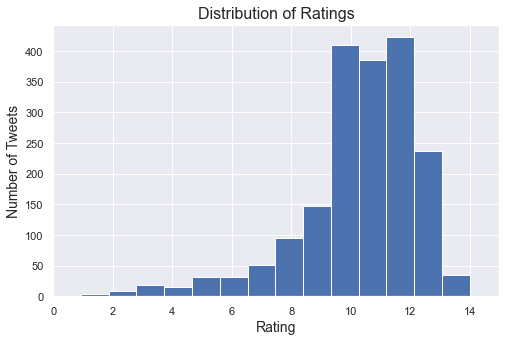

In [133]:
we_rate_dogs['rating'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

The distribution of ratings is very skewed to the left. From the descriptive statistics above we see that 75% of all ratings are between 10 and 14 inclusive (the IQR is from 10 to 12).

In [134]:
# Percentage of tweets with rating of 10 and up
rating_10up_total = sum(we_rate_dogs.rating >= 10)
rating_10up_perc = round(rating_10up_total * 100 / we_rate_dogs.shape[0])
print("Number of tweets with rating 10+:  {}".format(rating_10up_total))
print("Percentage of tweets:                {}%".format(round(rating_10up_perc, 3)))

Number of tweets with rating 10+:  1489
Percentage of tweets:                79%


In [135]:
# How many tweets have favorite count <= retweet count?
sum(we_rate_dogs.favorite_count <= we_rate_dogs.retweet_count)

0

                 What is the most retweeted tweet to date? Top 5.

In [136]:
we_rate_dogs.sort_values(by = 'favorite_count', ascending = False).head(5)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stage,source,text
730,744234799360020481,2016-06-18 18:26:18+00:00,13,70451,144449,Labrador_retriever,82,None,floofer,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
292,822872901745569793,2017-01-21 18:26:02+00:00,13,39816,123794,Lakeland_terrier,19,None,floofer,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
105,866450705531457537,2017-05-22 00:28:40+00:00,13,30097,108616,French_bulldog,90,Jamesy,floofer,Twitter for iPhone,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr"
762,739238157791694849,2016-06-04 23:31:25+00:00,13,52717,106955,Eskimo_dog,50,None,floofer,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC
58,879415818425184262,2017-06-26 19:07:24+00:00,13,37317,92628,English_springer,38,Duddles,floofer,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY


What is the most retweeted tweet to date? Top 5.

In [137]:
we_rate_dogs.sort_values(by = 'retweet_count', ascending = False).head(5)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,stage,source,text
730,744234799360020481,2016-06-18 18:26:18+00:00,13,70451,144449,Labrador_retriever,82,None,floofer,Twitter for iPhone,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
762,739238157791694849,2016-06-04 23:31:25+00:00,13,52717,106955,Eskimo_dog,50,None,floofer,Twitter for iPhone,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC
292,822872901745569793,2017-01-21 18:26:02+00:00,13,39816,123794,Lakeland_terrier,19,None,floofer,Twitter for iPhone,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
58,879415818425184262,2017-06-26 19:07:24+00:00,13,37317,92628,English_springer,38,Duddles,floofer,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY
315,819004803107983360,2017-01-11 02:15:36+00:00,14,34461,82496,standard_poodle,35,Bo,floofer,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1


In [139]:
with_stage_sum = sum(we_rate_dogs.stage != 'none')
tweets_with_stage = round(with_stage_sum * 100 / we_rate_dogs.shape[0])
print("Number of tweets WITH stage:  {}".format(with_stage_sum))
print("Percentage of tweets:          {}%".format(round(tweets_with_stage, 3)))

Number of tweets WITH stage:  1894
Percentage of tweets:          100%


What are the 10 most common breeds of dogs tweeted about? (Excluding the category 'none'.)

In [140]:
str = "Number of tweets with 'none' predicted breed:  {} ({}%)"
none_count = sum(we_rate_dogs.breed == 'none')
none_perc = none_count * 100 / we_rate_dogs.shape[0]
print(str.format(none_count, round(none_perc)))

str = "Number of distinct breeds:  {}"
print(str.format(len(we_rate_dogs.breed.unique())))

Number of tweets with 'none' predicted breed:  295 (16%)
Number of distinct breeds:  113


In [141]:
top10_breeds_count = \
we_rate_dogs[we_rate_dogs.breed != 'none'].breed.value_counts().head(10)
print("Breed and number of tweets")
print("--------------------------")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / we_rate_dogs.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))

Breed and number of tweets
--------------------------
golden_retriever            149
Labrador_retriever          95 
Pembroke                    89 
Chihuahua                   88 
pug                         62 
toy_poodle                  49 
chow                        44 
Pomeranian                  40 
Samoyed                     40 
Chesapeake_Bay_retriever    31 
Name: breed, dtype: int64

Top 10 dog breeds make up 36% of all tweets


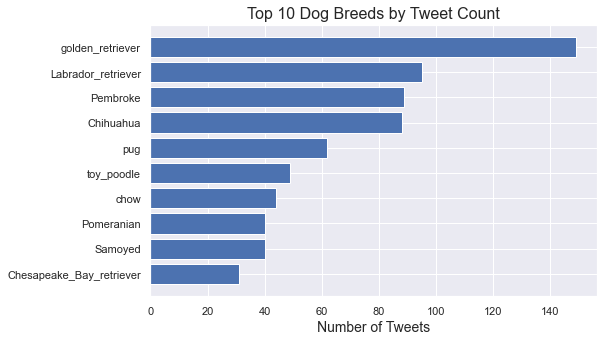

In [142]:
plt.barh(top10_breeds_count.index, top10_breeds_count)

plt.xlabel('Number of Tweets', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

The bar chart above shows that the most common dog that is tweeted about, with almost 150 tweets, is the Golden Retriever, as identified (predicted) by the neural network. Labrador Retrievers, Pembrokes and Chihuahuas are fairly close together in 2nd, 3rd, and 4th place. Further down we'll take a look at what are the most favourited dog breeds.

                          Bivariate Analysis

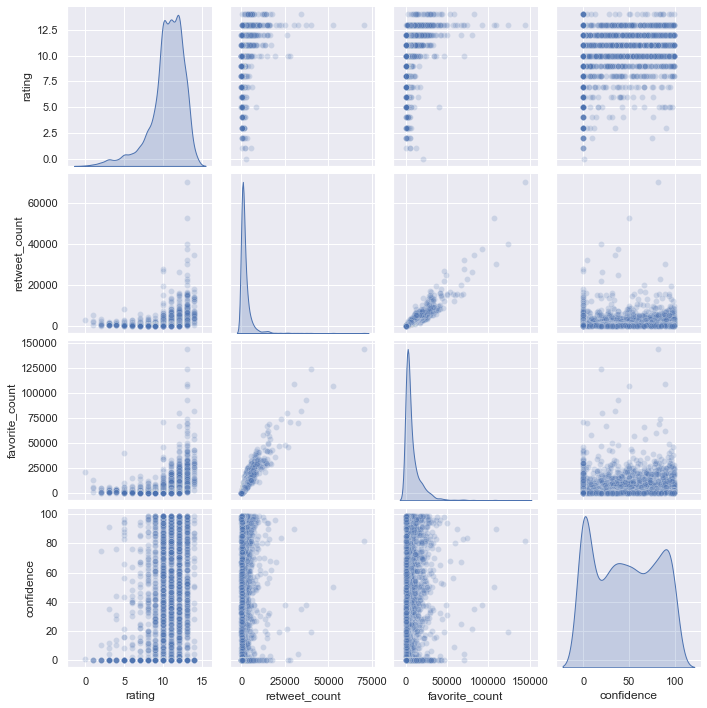

In [143]:
sns.pairplot(we_rate_dogs, 
             vars = ['rating', 'retweet_count', 'favorite_count', 'confidence'], 
             diag_kind = 'kde', plot_kws = {'alpha': 0.2});

What dog breeds have the highest overall favourite counts?

In [144]:
fav_counts_breed = we_rate_dogs[we_rate_dogs.breed != 'none']
fav_counts_breed = fav_counts_breed.groupby(['breed'])
fav_counts_breed = fav_counts_breed['favorite_count'].sum()
fav_counts_breed = fav_counts_breed.sort_values(ascending = False)
top10_breeds_fav_counts = fav_counts_breed.head(10)
top10_breeds_fav_counts

breed
golden_retriever      1624991
Labrador_retriever    979263 
Pembroke              859293 
Chihuahua             529698 
French_bulldog        524829 
Samoyed               462570 
chow                  360949 
cocker_spaniel        351251 
pug                   324502 
malamute              294673 
Name: favorite_count, dtype: int32

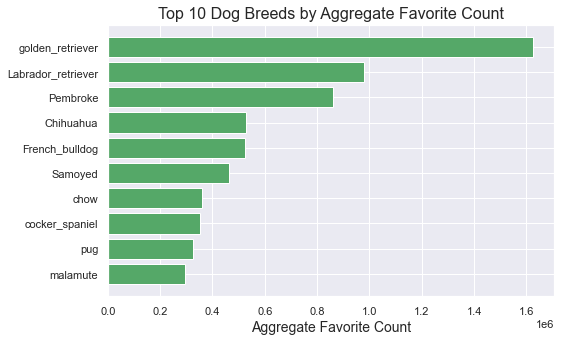

In [145]:
plt.barh(top10_breeds_fav_counts.index, top10_breeds_fav_counts, color = 'g')

plt.xlabel('Aggregate Favorite Count', fontsize = 14)
# plt.ylabel('Dog Breed', fontsize = 12)
plt.title('Top 10 Dog Breeds by Aggregate Favorite Count', fontsize = 16)
plt.gca().invert_yaxis()
plt.show();

The plot above shows the top 10 dog breeds ranked by aggregate favourite counts. It looks very similar to the barplot ealier of top 10 dog breeds ranked by tweet, and in fact the top 4 dog breeds are the same. This also makes sense, as these dogs have the highest number of tweets.

Both groups have these 8 dog breeds in common:

In [146]:
list(set(top10_breeds_count.index) & set(top10_breeds_fav_counts.index))

['Pembroke',
 'chow',
 'golden_retriever',
 'Chihuahua',
 'Labrador_retriever',
 'pug',
 'Samoyed']

How are ratings distributed within each of the dog breeds with highest favourite counts?

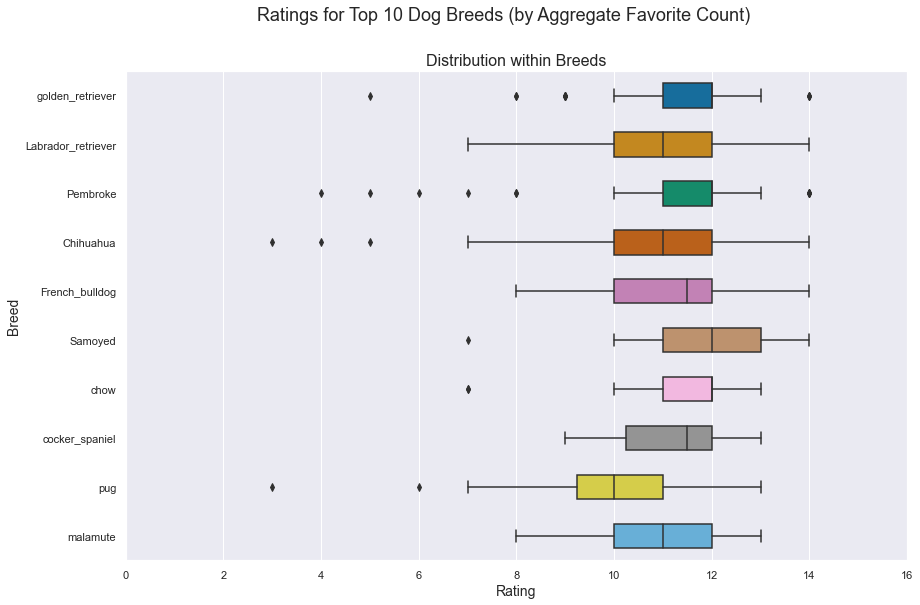

In [147]:
plt.figure(figsize = (14, 9))
bplot = sns.boxplot(y = 'breed', x = 'rating',
                    data = we_rate_dogs,
                    orient = 'h',
                    width = 0.5,
                    palette = "colorblind",
                    order = top10_breeds_fav_counts.index.tolist())
plt.xlim(0, 16)

# title and labels
plt.suptitle('Ratings for Top 10 Dog Breeds (by Aggregate Favorite Count)', fontsize = 18)
plt.title('Distribution within Breeds', fontsize = 16)
plt.ylabel("Breed",  fontsize = 14)
plt.xlabel('Rating',  fontsize = 14)
# plt.yticks(rotation = 60,  fontsize = 12)
plt.show()

The boxplot here shows the distribution of ratings within each of the top 10 dog breeds as ranked by aggregate favourite count. All the breeds range between 7 and 13, with a only a few outliers, while four of the breeds have the lower ratings at 10. Another four breeds have the highest ratings at 14.

In [148]:
# Add random amount of float between [0.0:0.7) to input x
def jitter(x):
    random.seed()
    return x + random.uniform(0, 0.7)

In [149]:
# Return the number of days from a timedelta object x
def days_from_start(x):
    return x.days

# start date
first_day = we_rate_dogs.timestamp.min()

# array with days corresponding to timestamp
we_rate_dogs_days = (we_rate_dogs.timestamp - first_day).apply(days_from_start)

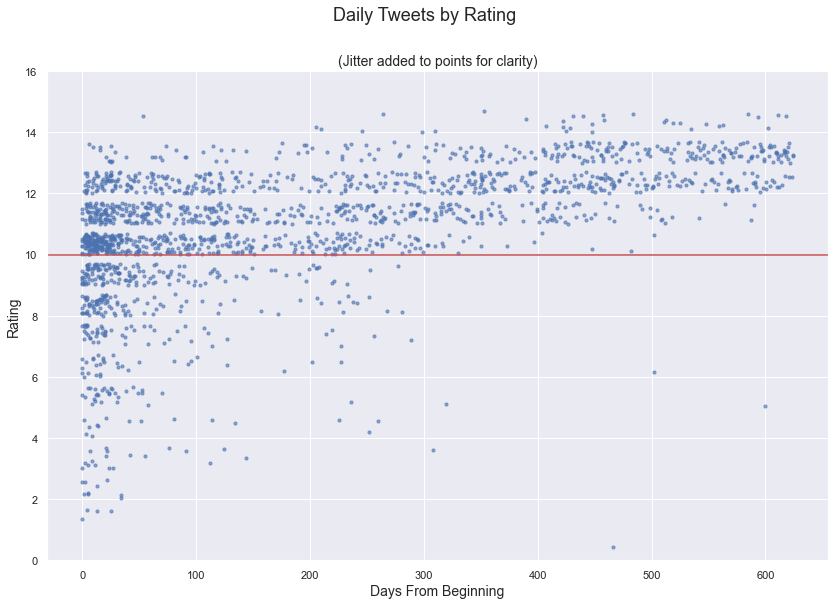

In [150]:
plt.figure(figsize = (14, 9))

# add jitter to the rating so it's not so cluttered on each line
rating_jitter = we_rate_dogs.rating.apply(jitter)

plt.scatter(we_rate_dogs_days, rating_jitter, s = 10, alpha = 0.6)

# title and labels
plt.suptitle('Daily Tweets by Rating', fontsize = 18)
plt.title('(Jitter added to points for clarity)', fontsize = 14)

plt.xlabel('Days From Beginning', fontsize = 14)
plt.ylabel('Rating', fontsize = 14)

# add the line at 10 for reference; ratings are out of 10
plt.axhline(y = 10, color = 'r')
plt.ylim(0, 16)

plt.show();

The plot here has the tweet ratings by day, showing how the ratings are generally over 10 in the latter half of the time period, after the account has been running for 300 days.

                    Multivariate Analysis
Relationship between favourite and retweet counts with dog rating as colour.

C:\Users\USER\AppData\Local\Temp\ipykernel_13852\431691156.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


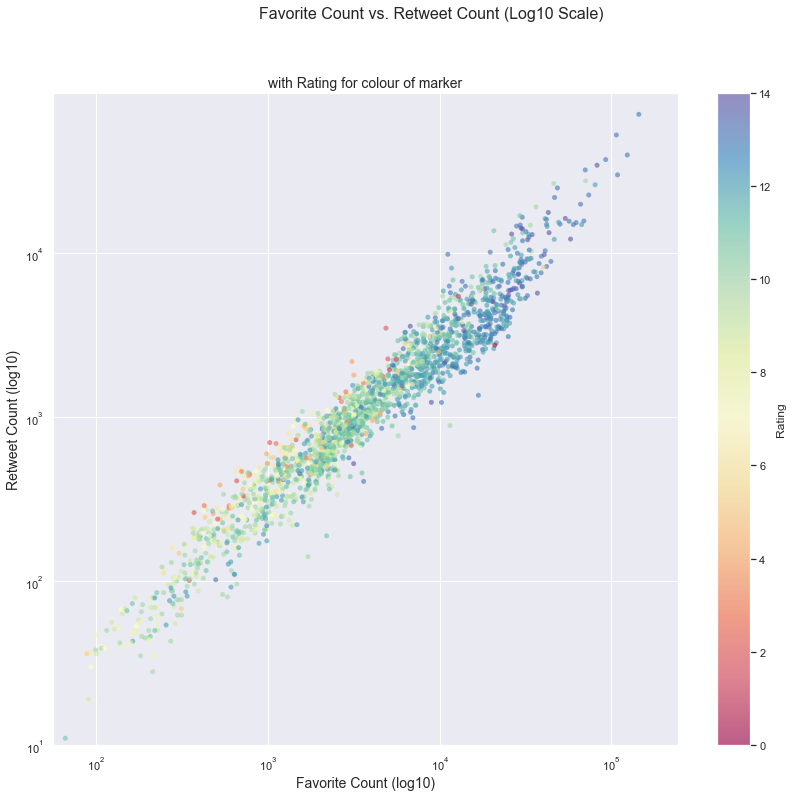

In [151]:
# Adapted from an answer from: 
# https://stackoverflow.com/questions/25741214/how-to-use-colormaps-to-color-plots-of-pandas-dataframes
# -------------------------------------------------------------------------

df = we_rate_dogs

cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 12))

plt.xscale('log')
plt.yscale('log')
plt.xlim(df['favorite_count'].min() - 10, df['favorite_count'].max() + 100000)
plt.ylim(10, df['retweet_count'].max() + 25000)
colours = df['rating']
markers = 25

plt.scatter(df['favorite_count'], df['retweet_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.6)

# title and labels
plt.suptitle('Favorite Count vs. Retweet Count (Log10 Scale)', fontsize = 16)
plt.title('with Rating for colour of marker', fontsize = 14)
plt.xlabel('Favorite Count (log10)', fontsize = 14)
plt.ylabel('Retweet Count (log10)', fontsize = 14)

# colour bar
cbar = plt.colorbar()
cbar.set_label('Rating')

plt.show();

This plot is showing a few things here, but the overall picture is the strong positive correlation between retweet counts and favorite counts. It does make sense though, personally, if I 'like' a tweet (favourite it) I am more likely to retweet it as well. The tightly packed points follow a distinct linear trend with a positive slope, so as favorite count increases so does the retweet count. Also evident, tweets with high favorite counts and high retweet counts also have higher ratings, as shown by the concentration of blue points.

C:\Users\USER\AppData\Local\Temp\ipykernel_13852\2515692456.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = plt.colorbar()


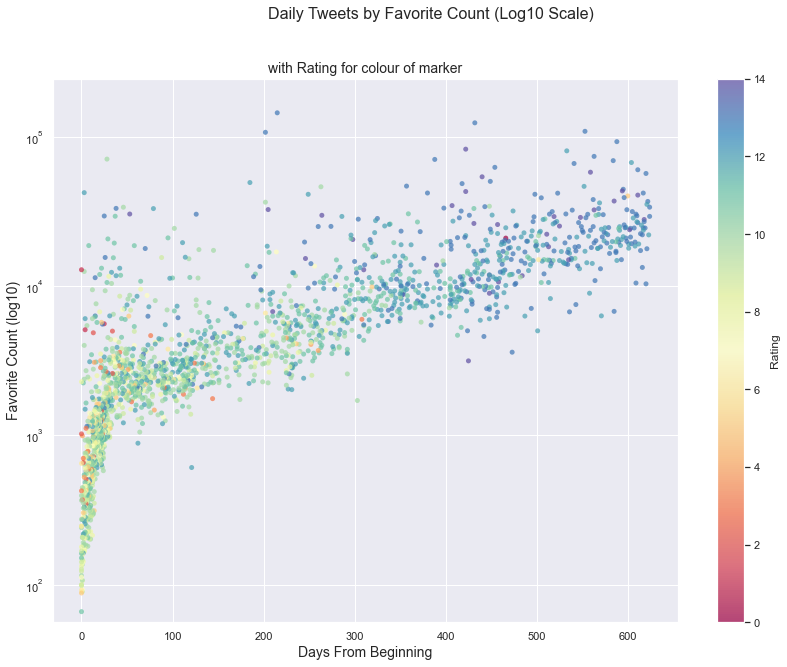

In [152]:
# Adapted from an answer from: 
# https://stackoverflow.com/questions/25741214/how-to-use-colormaps-to-color-plots-of-pandas-dataframes
# -------------------------------------------------------------------------

cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 10))

plt.yscale('log')
plt.ylim(we_rate_dogs['favorite_count'].min() - 10, 
         we_rate_dogs['favorite_count'].max() + 100000)
colours = we_rate_dogs['rating']
markers = 25

plt.scatter(we_rate_dogs_days, we_rate_dogs['favorite_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.7)

# title and labels
plt.suptitle('Daily Tweets by Favorite Count (Log10 Scale)', fontsize = 16)
plt.title('with Rating for colour of marker', fontsize = 14)
plt.xlabel('Days From Beginning', fontsize = 14)
plt.ylabel('Favorite Count (log10)', fontsize = 14)

cbar = plt.colorbar()
cbar.set_label('Rating')
plt.show();

In this plot the x-axis scale is reversed showing time in the past, and moving forward from left to right. Clearly, the more recent tweets (younger/fewer days old on the right side) are rated consistently higher (blue and green) than much older tweets (yellow and green). Also interesting is that tweets older than 1100 days have lower favourite counts; this is most likely because this was at the start of the twitter account, and so there weren't as many followers at the time.

The slope of the line is also increasing at a steady rate from around 1100 days, reflecting the daily increase in tweets being favourited. This clearly shows that the twitter account followers were active, and possibly growing, during the timeframe represented in the archive.

The older tweets also have much more variability in ratings as seen by the range of colours (more yellow and green), and also in the range of favorite_count.